In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")
#hallo
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import ufloat

In [2]:
data = []
for file in os.listdir('Data'):
        with open('Data/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])

#########################################################055_Torr
[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 131
    # data points      = 750
    # variables        = 9
    chi-square         = 1410.48886
    reduced chi-square = 1.90349373
    Akaike info crit   = 491.713817
    Bayesian info crit = 533.294476
    R-squared          = 0.99978904
[[Variables]]
    g1_amplitude:  36609.7631 +/- 758.456292 (2.07%) (init = 1)
    g1_center:     206.172448 +/- 2.06110440 (1.00%) (init = 200)
    g1_sigma:      76.1966732 +/- 1.32126643 (1.73%) (init = 0.3)
    g2_amplitude:  35732.9466 +/- 988.414888 (2.77%) (init = 1)
    g2_center:     364.080399 +/- 0.93708313 (0.26%) (init = 350)
    g2_sigma:      48.3743854 +/- 1.06589267 (2.20%) (init = 0.3)
    g3_amplitude:  25973.6391 +/- 457.000965 (1.76%) (init = 1)
    g3_center:     519.559376 +/- 1

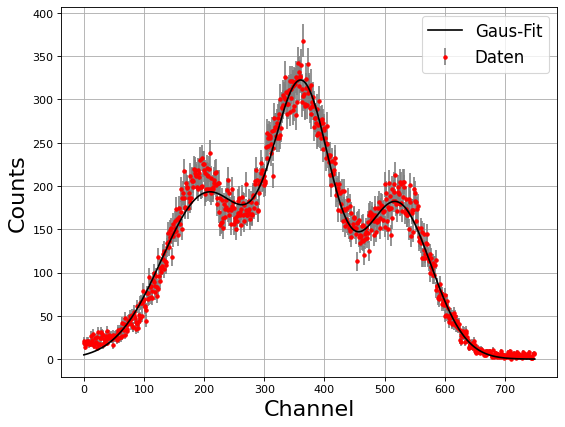

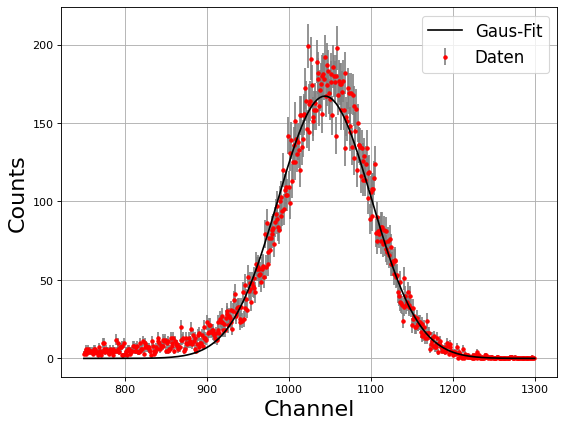

In [3]:
for i in data:

    if i[0] == '055_Torr':

        print("#########################################################"+str(i[0]))

        res = f.gaus3fit(i,0,750,200,150,250,350,300,400,520,450,600)
        torr55_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])

        res = f.gaus1fit(i,750,1300,1100,900,1200)
        torr55_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])

        channel = np.array([torr55_3.out.params["g1_center"].value,torr55_3.out.params["g2_center"].value,torr55_3.out.params["g2_center"].value,torr55_3.out.params["g3_center"].value,torr55_1.out.params["center"].value])
        channelerr = np.array([torr55_3.out.params["g1_sigma"].value,torr55_3.out.params["g2_sigma"].value,torr55_3.out.params["g2_sigma"].value,torr55_3.out.params["g3_sigma"].value,torr55_1.out.params["sigma"].value])
        

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 0.80799162
    reduced chi-square = 0.26933054
    Akaike info crit   = -5.11320753
    Bayesian info crit = -5.89433170
    R-squared          = 0.99999807
[[Variables]]
    slope:      294.321053 +/- 13.8964696 (4.72%) (init = 295.0323)
    intercept: -1227.52706 +/- 82.7452411 (6.74%) (init = -1232.334)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.988


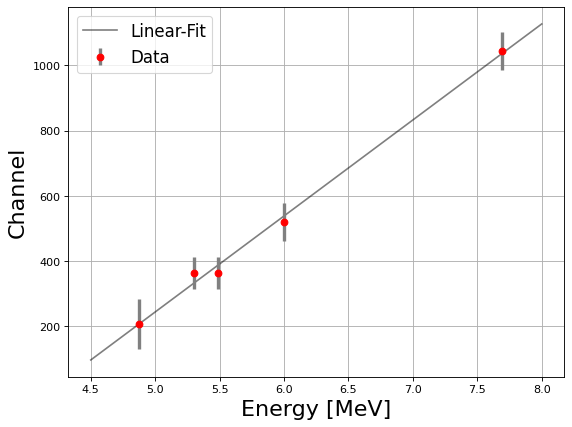

In [4]:
energy = np.array([4.871,5.3,5.49,6.0,7.69])
res = f.linear_fit(channel,energy,channelerr)
#res.plot()
plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(y=channel,x=energy,yerr=channelerr,fmt='o',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Data")
plt.plot(np.arange(4.5,8.5,0.5),res.eval(x=np.arange(4.5,8.5,0.5)),color='k',linestyle='-',alpha=0.5,label="Linear-Fit")
plt.grid()
plt.legend(fontsize = 15)
plt.ylabel("Channel",fontsize=20)
plt.xlabel("Energy [MeV]",fontsize=20)
print(res.fit_report())
plt.savefig('Results/ChannelenergyCalibration.pdf')

In [5]:
for i in np.arange(3,6,0.00001):
    if res.eval(x=i)>=0:
        print(i)
        break


slope = ufloat(res.params['slope'].value,res.params['slope'].stderr)
print(1/slope)

4.17071000000767
0.00340+/-0.00016


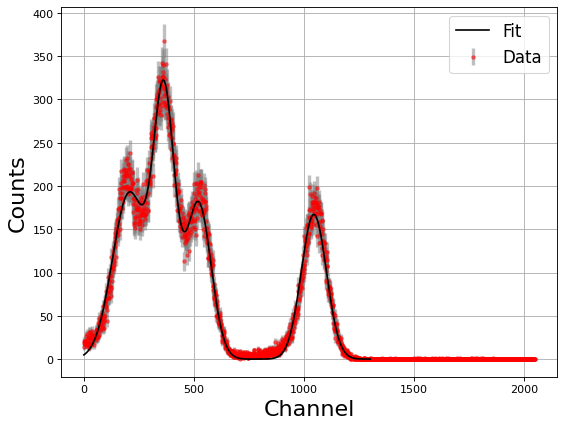

In [6]:
plt.figure(figsize=(8,6),dpi=80,linewidth=50)
for i in data:

    if i[0] == '055_Torr':
        plt.errorbar(i[1],i[2],yerr=i[3],fmt='.',ecolor='gray',color='r', elinewidth=3, capsize=0,zorder=5,label="Data",alpha=0.5)
plt.plot(torr55_3.fit_plot[0],torr55_3.fit_plot[1],zorder = 10,color='k',linestyle='-',label="Fit")
plt.plot(torr55_1.fit_plot[0],torr55_1.fit_plot[1],zorder = 10,color='k',linestyle='-')


plt.grid()
plt.legend(fontsize = 15)
plt.xlabel('Channel',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.savefig('Results/channelenergyspeck.pdf')
plt.show()